# Lecture 7: Bias-Variance Tradeoff, Regularization
## 10/16/18

### Table Of Contents
1. [Recap](#recap)  
2. [Bias-Variance Tradeoff](#bv-tradeoff)
3. [Regularization](#regularization)  


### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Authored by [Ajay Raj](mailto:araj@berkeley.edu), [Nichole Sun](mailto:nicholesun@berkeley.edu), [Rosa Choe](mailto:rosachoe@berkeley.edu).

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotting import overfittingDemo, plot_multiple_linear_regression, ridgeRegularizationDemo, lassoRegularizationDemo
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

%matplotlib inline

<a id='recap'></a>
## Recap

![alt text](fit_graphs.png "Fit Graphs")

Bias corresponds to underfitting. If we look at the first model, the points seem to follow some sort of curve, but our predictor is linear and therefore, unable to capture all the points. In this case, we have chosen a model which is not complex enough to accurately capture all the information from our data set. 

If we look at the last model, the predictor is now overly complex because it adjusts based on every point in order to get as close to every data point as possible. In this case, the model changes too much based on small fluctuations caused by insignificant details in the data. 

<a id='bv-tradeoff'></a>
## Bias-Variance Tradeoff

Today we'll perform **model evaluation**, where we'll judge how our linear regression models actually perform. Last week, you talked about a **loss function**, which describes a numerical value for how far your model is from the true values.

$$\textit{RSS} = \sum_{i=0}^n {e_i}^2 = \sum_{i=0}^n (y_i - mx_i - b)^2$$

We'll change it up a little: Say that there are $p$ features, or independent variables. Your task is to create a model $\hat{f}$, such that the loss is now:

$$\frac{1}{n} \sum_i^n (y_i - \hat{f}(x_i))^2$$

In this loss function, $y_i$ is a number, and $x_i$ is a $p$-vector, because there are $p$ features. This loss is called **mean squared error**, or **MSE**.

Now, we'll talk about other ways to evaluate a model.

First, let's define some terms.

We can say that everything in the universe can be described with the following equation:

$$y = h(x) + \epsilon$$

- $y$ is the quantity you are trying to model
- $x$ are the parameters (independent variables)
- $h$ is the **true model** for $y$ in terms of $x$
- $\epsilon$ represents **noise**, a random number which has mean zero

Let $\hat{f}$ be your model for $y$ in terms of $x$.

### Bias

When evaluating a model, the most intuitive first step is to look at how well the model performs. For classification, this may be the percentage of data points correctly classified, or for regression it may be how close the predicted values are to actual. The **bias** of a model is a measure of how close our prediction is to the actual value on average from an average model. Note that bias is not a measure of a single model, it encapuslates the scenario in which we collect many datasets, create models for each dataset, and average the error over all of models. Bias is not a measure of error for a single model, but a more abstract concept describing the average error over all errors. A low value for the bias of a model describes that on average, our predictions are similar to the actual values.

### Variance
The **variance** of  a model relates to the variance of the distribution of all models. In the previous section about bias, we envisoned the scenario of collecting many datasets, creating models for each dataset, and averaging the error overall the datasets. Instead, the variance of a model describes the variance in prediction. While we might be able to predict a value very well on average, if the variance of predictions is very high this may not be very helpful, as when we train a model we only have one such instance, and a high model variance tells us little about the true nature of the predictions. A low variance describes that our model will not predict very different values for different datasets.

![alt text](BiasVariance.jpg "Bias Variance Visualization")

The image describes what bias and variance are in a more simplified example. Consider that we would like to create a model that selects a point close to the center. The models on the top row have low bias, meaning the center of the cluster is close to the red dot on the target. The models on the left column have low variance, the clusters are quite tight, meaning our predictions are close together.

What is the order of best scenarios?

### The Tradeoff

We are trying to minimize **expected error**, or the average **MSE** over all datasets. It turns out (with some advanced probability gymnastics), that:

$$\text{Expected Error} = \text{Noise Variance} + \text{Bias}^2 + \text{Variance}$$

Note that $\text{Noise Variance}$ is constant: we assume there is some noise, and $\text{Noise Variance}$ is simply a value that describes how noisy your dataset will be on average.

This equation defines what is known as the **bias variance tradeoff**. 

![alt text](BiasVarianceTradeoff.png "Bias Variance Tradeoff")

Image from http://scott.fortmann-roe.com/docs/BiasVariance.html


Why is this true intuitively?

At some point as we decrease **bias**, instead of getting closer to the **true model** $h$, we go past and try to fit to the $\epsilon$ (noise) that is part of our current dataset. This is equivalent to making our model more noisy: which means that over all datasets, it has more **variance**.

**Questions for understanding**:
> 1. Where does underfitting and overfitting lie in the graph above? How do they relate to bias and variance?
> 2. Why can't we usually just make a bunch of models with low bias and high variance and average them?
> 3. Why is low variance important in models?

### Polynomial Regression

Let's revisit the polynomial problem from last week.

In this case, if our model has degree $d$, we have $d + 1$ features: $x = [x^0, x^1, ..., x^d]$. Now, we have a linear model with $d + 1$ features:

$$\hat{f}(x) = \sum_{i=0}^{d} a_i x_i$$

Model complexity in this case is the degree of the polynomial. As we saw last week, as $d$ increases, model complexity increases. The model gets better, but then gets erratic. This directly corresponds to the bias-variance graph above.

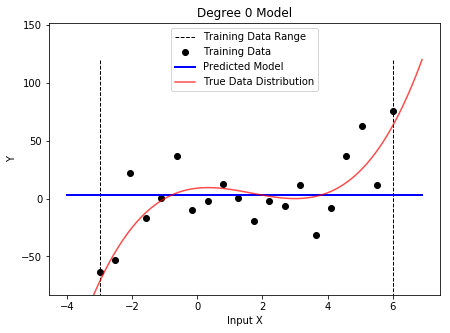

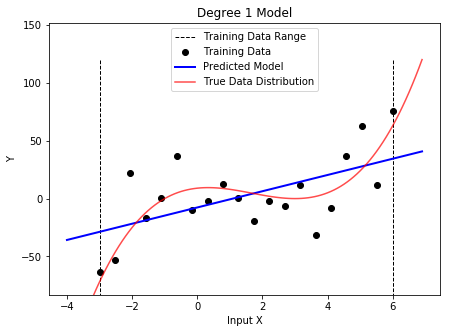

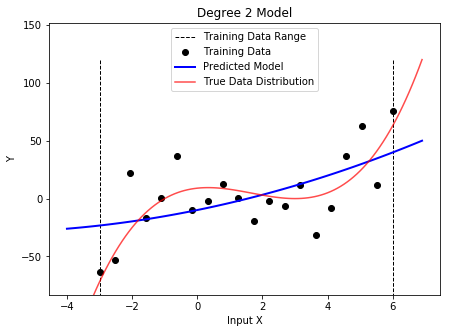

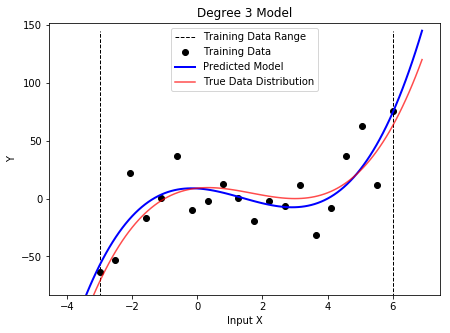

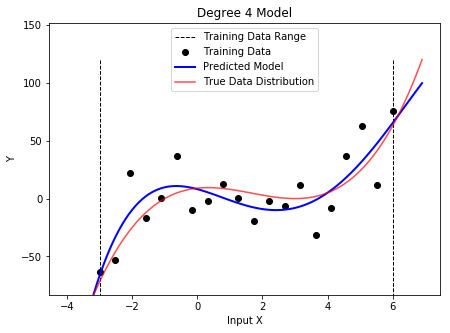

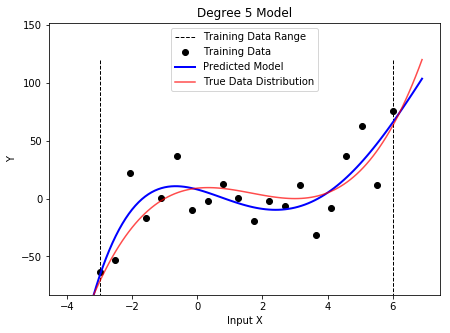

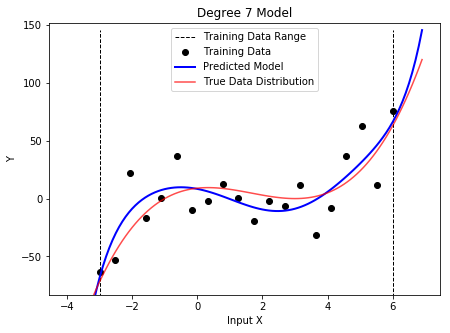

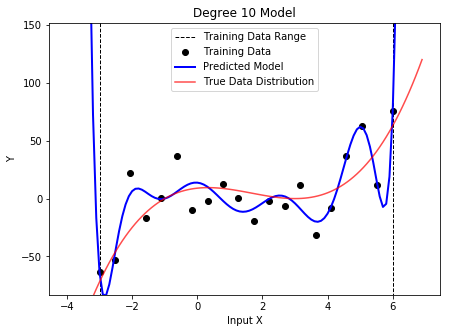

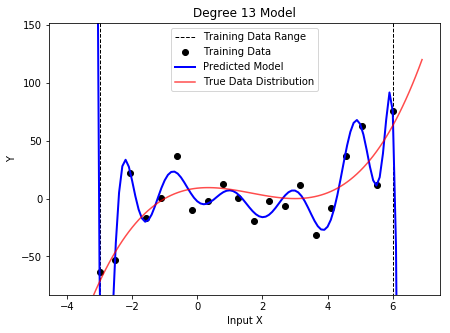

In [2]:
overfittingDemo()

As we saw last time, the best model was a degree 3 model.

In [2]:
mpg = pd.read_csv("./mpg.csv", index_col="name") # load mpg dataset
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) # remove columns with missing horsepower values
mpg_train, mpg_test = train_test_split(mpg, test_size = .2, random_state = 0) # split into training set and test set
mpg_train, mpg_validation = train_test_split(mpg_train, test_size = .5, random_state = 0)
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
toyota corolla,34,4,108,70,2245,16,82,3
buick century,17,6,231,110,3907,21,75,1
cadillac eldorado,23,8,350,125,3900,17,79,1
bmw 320i,21,4,121,110,2600,12,77,2
ford fairmont futura,24,4,140,92,2865,16,82,1


<a id='regularization'></a>
## Regularization

Last week we talked about validation as a means of combating overfitting. Another method is to add *regularization* terms to our loss function. **Regularization** basically penalizes complexity in our models. This allows us to add explanatory variables to our model without worrying as much about overfitting. Here's what our ordinary least squares model looks like with a regularization term:

$$\hat{\boldsymbol{\theta}} = \arg\!\min_\theta \sum_{i=0}^n (y_i - f_\boldsymbol{\theta}(x_i))^2 + \lambda R(\boldsymbol{\theta})$$

We've written the model a little differently here, but the first term is the same as the ordinary least squares regression model you learned last week. This time it's just generalized to any function of $x$ where $\theta$ is a list of parameters, or weights on our explanatory variables, such as coefficients to a polynomial. We're minimizing a loss function to find the best coefficients for our model. 

The second term is the **regularization** term. The $\lambda$ parameter in front of it dictates how much we care about our regularization term – the higher $\lambda$ is, the more we penalize large weights, and the more the regularization makes our weights deviate from OLS. 

**Question**: What happens when $\lambda = 0$?

So, what is $R(\theta)$? It could be a lot of things! Today we'll talk about two of the most common regularization functions – ridge and LASSO. 

<table>
    <tr><td>Ridge</td><td>L2 Norm</td><td>$R(\boldsymbol{\theta}) = \sum\limits_{i=0}^n \theta_i^2$</td></tr>
    <tr><td>LASSO</td><td>L1 Norm</td><td>$R(\boldsymbol{\theta}) = \sum\limits_{i=0}^n \lvert\theta_i\rvert$</td></tr>
</table>

<a id='ridge'></a>
### Ridge 
In **ridge** regression, the regularization function is the sum of squared weights. One of the nice things about ridge regression is that there is always a unique, mathematical solution that can be found using a known formula. The solution involves linear algebra, so you don't need to know it, but the existence of this formula also makes it computationally easy to solve.

$$\hat{\boldsymbol{\theta}} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{Y}$$


In [3]:
from sklearn.linear_model import LinearRegression

x_train = mpg_train[["displacement", "horsepower", "weight", "acceleration"]]
y_train = mpg_train[["mpg"]]

x_validation = mpg_validation[["displacement", "horsepower", "weight", "acceleration"]]
y_validation = mpg_validation[["mpg"]]

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_prediction = linear_model.predict(x_validation)
linear_loss = mean_squared_error(linear_prediction, y_validation)

print("Root Mean Squared Error of linear model: {:.2f}".format(linear_loss))

Root Mean Squared Error of linear model: 18.70


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 10.0)
ridge_model.fit(x_train, y_train)

ridge_prediction = ...
ridge_loss = ... # mean squared error or ridge model


print("Root Mean Squared Error of ridge model: {:.2f}".format(ridge_loss))

<a id='lasso'></a>
### LASSO
In **LASSO** regression, the regularization function is the sum of absolute values of the weights. If there's one thing you should know about LASSO is that it is *sparsity inducing*. This just means that it forces some weights to take on zero values, leaving you with fewer explanatory variables in the resulting model than you put in. Unlike ridge regression, LASSO doesn't necessarily have a unique solution, and there's no formula that determines what the optimal weights should be.

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 1.0)
lasso_model.fit(x_train, y_train)

lasso_prediction = ...
lasso_loss = ...

print("Root Mean Squared Error of lasso model: {:.2f}".format(lasso_loss))
print("Root Mean Squared Error of linear model: {:.2f}".format(linear_loss))

### Visualizing Ridge and LASSO
We just told you a lot of things about ridge and lasso, but here are some visualizations to help you understand the intuition behind some of the characteristics of these two regularization methods. Another way to describe the modified minimization function above is that it's the same loss function as before, with the *additional constraint* that $R(\boldsymbol{\theta}) \leq t$. Now, $t$ is related to $\lambda$ but the exact relationship between the two parameters depends on your data. Regardless, let's take a look at what this means in the two-dimensional case. For ridge,

$$\theta_0^2 + \theta_1^2 \leq t$$

Does this look familiar to you? What if it's in the form $x^2 + y^2 \leq t$? Or how about now:
<img src='http://vikingsseason5i.com/wp-content/uploads/2018/08/circle-equation-circle-equation-unit-circle.jpg' width=400 />

Lasso is of the form $$\left|\theta_0\right| + \left|\theta_1\right| \leq t$$ This one's a little harder to interpret, perhaps this will help inspire you:
<img src='https://cdn.kastatic.org/ka-perseus-graphie/3b9b8f4b4dac19e1197e9dd94553d0822f9fe69a.png' />

#### Norm Balls
<img src='https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg' width=400/>
<img src='norm_balls.png' width=400/>

The rhombus and circle as a visualization of the regularization term, while the blue circles are the topological curves representing the loss function based on the weights. You want to minimize the sum of these, which means you want to minimize each of those. The point that minimizes the sum is the minimum point at which they intersect.


**Question**: Based on these visualizations, could you explain why LASSO is sparsity-inducing?

Turns out that the $L2-norm$ is always some sort of smooth surface, from a circle in 2D to a sphere in 3D. On the other hand, LASSO always has sharp corners. This is exactly the feature that makes it sparsiy-inducing. As you might imagine, just as humans are more likely to bump into sharp corners than smooth surfaces, the loss term is also most likely to intersect the $L2-norm$ at one of the corners.

### Regularization and Bias Variance
As we mentioned earlier, the bias is the average OLS loss term across multiple models of the same family (e.g. same degree polynomial) trained on separate datasets. Variance is the average variance of the weight vectors (coefficients) on your features. 

Without the regularization term, we’re just minimizing bias; the regularization term means we won’t get the lowest possible bias, but we’re exchanging that for some lower variance so that our model does better at generalizing to data points outside of our training data.


### Demo

Let's return to the polynomial example, and start with a degree 8 polynomial.

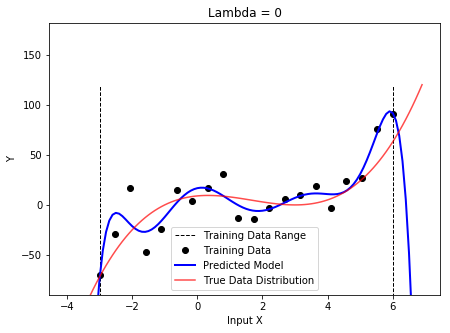

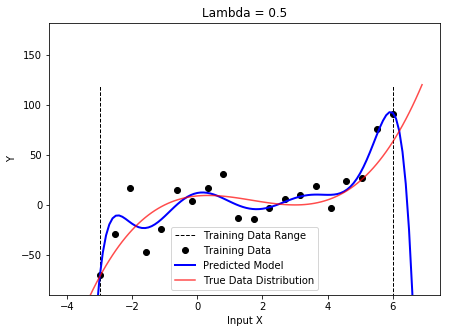

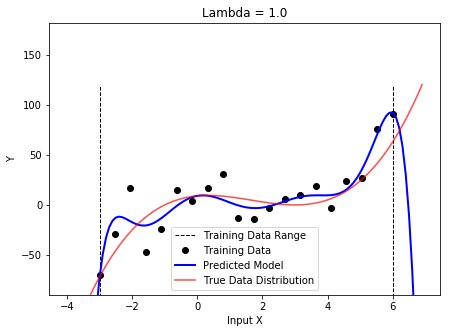

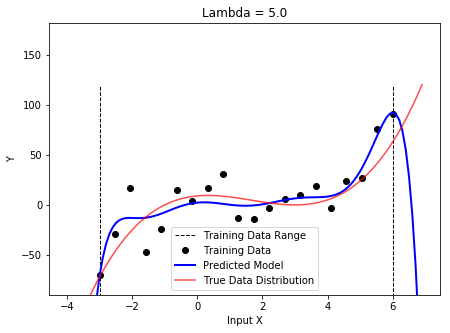

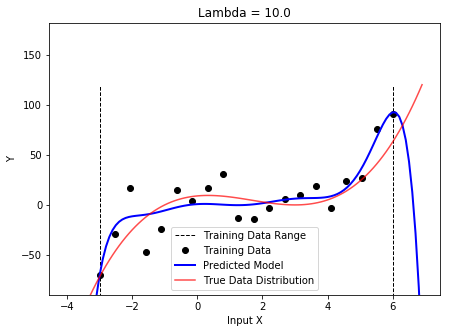

In [3]:
ridgeRegularizationDemo([0, 0.5, 1.0, 5.0, 10.0], 8)

## Sanity Check

1. What happens as $\lambda$ increases?
    1. bias increases, variance increases
    2. bias increases, variance decreases
    3. bias decreases, variance increases
    4. bias decreases, variance decreases
2. **True** or **False**? Bias is how much error your model makes.
3. What is **sparsity**?
4. For each of the following, choose **ridge**, **lasso**, **both**, or **neither**:
    1. L1-norm
    2. L2-norm
    3. Induces sparsity
    4. Has analytic (mathematical) solution
    5. Increases bias
    6. Increases variance